<h1>Анализ данных</h1>

In [56]:
import pandas as pd

# Загрузка файла
file_path = '../data/vacancies.csv'
df = pd.read_csv(file_path)

# Просмотр первых строк данных
df.head()



,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,professional_roles,accept_incomplete_resumes,experience,employment,employment_form,internship,adv_response_url,is_adv_vacancy,adv_context,branding
0,113847165,False,Заместитель Генерального директора,NaN,False,False,"{'id': '159', 'name': 'Астана', 'url': 'https:...","{'from': 600000, 'to': 800000, 'currency': 'KZ...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Нур-Султан (Астана)', 'street': 'про...",...,"[{'id': '35', 'name': 'Директор магазина, дире...",False,"{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,NaN,False,NaN,NaN
1,114301063,False,Юрист,NaN,False,False,"{'id': '159', 'name': 'Астана', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",NaN,...,"[{'id': '146', 'name': 'Юрист'}]",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,NaN,False,NaN,NaN
2,113990151,False,Java-программист,NaN,False,False,"{'id': '159', 'name': 'Астана', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",NaN,...,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,NaN,False,NaN,NaN
3,113741136,False,"Веб-дизайнер (Figma, Tilda, Elementor, UI\UX)",NaN,False,False,"{'id': '159', 'name': 'Астана', 'url': 'https:...","{'from': 200000, 'to': 400000, 'currency': 'KZ...","{'id': 'open', 'name': 'Открытая'}",NaN,...,"[{'id': '34', 'name': 'Дизайнер, художник'}]",True,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,NaN,False,NaN,NaN
4,114289740,False,Юрист-договорник в ТЭК,NaN,False,False,"{'id': '159', 'name': 'Астана', 'url': 'https:...",NaN,"{'id': 'open', 'name': 'Открытая'}",NaN,...,"[{'id': '146', 'name': 'Юрист'}]",False,"{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'FULL', 'name': 'Полная'}",False,NaN,False,NaN,NaN


In [58]:
# Очистка данных
df = df.drop_duplicates()  # Удаляем дубликаты
df = df.dropna(subset=['salary', 'name'])  # Удаляем строки с пропущенными зарплатами и названиями

# Преобразуем зарплаты в числовой формат (если они вложены в словари)
df['salary_min'] = df['salary'].apply(lambda x: eval(x)['from'] if isinstance(eval(x), dict) else None)
df['salary_max'] = df['salary'].apply(lambda x: eval(x)['to'] if isinstance(eval(x), dict) else None)

# Преобразуем дату в формат datetime
df['published_at'] = pd.to_datetime(df['published_at'])

In [59]:
# Основные статистики по числовым данным
df.describe()


,id,response_url,sort_point_distance,insider_interview,contacts,adv_response_url,adv_context,salary_min,salary_max
count,6.570000e+02,0.0,0.0,0.0,0.0,0.0,0.0,5.980000e+02,4.860000e+02
mean,1.129138e+08,NaN,NaN,NaN,NaN,NaN,NaN,3.682265e+05,5.574589e+05
std,1.056420e+06,NaN,NaN,NaN,NaN,NaN,NaN,2.481289e+05,4.135904e+05
min,1.072283e+08,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+02,7.000000e+02
25%,1.123347e+08,NaN,NaN,NaN,NaN,NaN,NaN,2.417500e+05,3.125000e+05
50%,1.128422e+08,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+05,4.650000e+05
75%,1.138544e+08,NaN,NaN,NaN,NaN,NaN,NaN,4.500000e+05,6.575000e+05
max,1.144855e+08,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+06,3.000000e+06


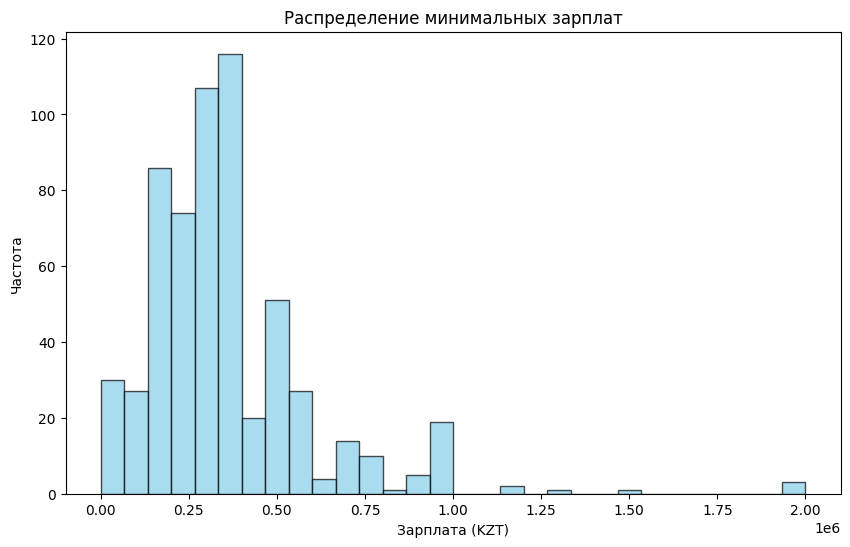

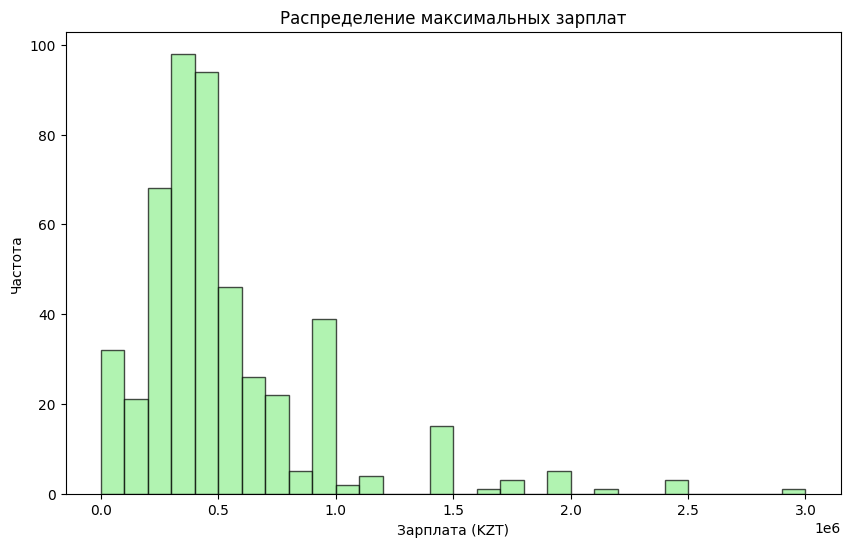

In [60]:
import matplotlib.pyplot as plt

# Распределение минимальной зарплаты
plt.figure(figsize=(10, 6))
plt.hist(df['salary_min'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение минимальных зарплат')
plt.xlabel('Зарплата (KZT)')
plt.ylabel('Частота')
plt.show()

# Распределение максимальной зарплаты
plt.figure(figsize=(10, 6))
plt.hist(df['salary_max'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Распределение максимальных зарплат')
plt.xlabel('Зарплата (KZT)')
plt.ylabel('Частота')
plt.show()


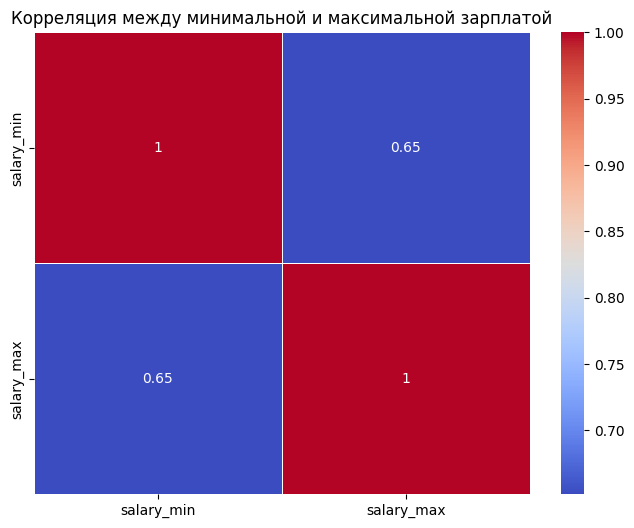

In [63]:
# Вычисление корреляций между числовыми столбцами
correlation_matrix = df[['salary_min', 'salary_max']].corr()

# Визуализация корреляции с использованием тепловой карты
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляция между минимальной и максимальной зарплатой')
plt.show()


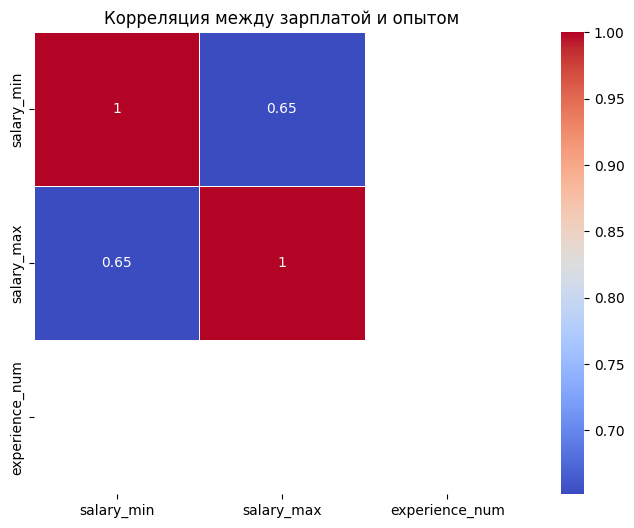

In [64]:
# Преобразуем опыт в числовое значение для анализа
df['experience_num'] = df['experience'].apply(lambda x: 7 if 'более 6' in str(x) else (5 if 'от 3 до 6' in str(x) else (3 if 'от 1 года до 3 лет' in str(x) else 0)))

# Вычисление корреляции между зарплатой и опытом
correlation_experience = df[['salary_min', 'salary_max', 'experience_num']].corr()

# Визуализация корреляции с использованием тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_experience, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляция между зарплатой и опытом')
plt.show()


In [65]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Инициализируем лемматизатор
lemmatizer = WordNetLemmatizer()

# Функция для очистки текста
def clean_text(text):
    text = text.lower()  # Приводим текст к нижнему регистру
    text = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text) if word.isalnum() and word not in stopwords.words('russian')])
    return text

# Применяем очистку ко всем столбцам с текстом
df['name_cleaned'] = df['name'].apply(clean_text)
df['professional_roles_cleaned'] = df['professional_roles'].apply(clean_text)
df['snippet_cleaned'] = df['snippet'].apply(clean_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


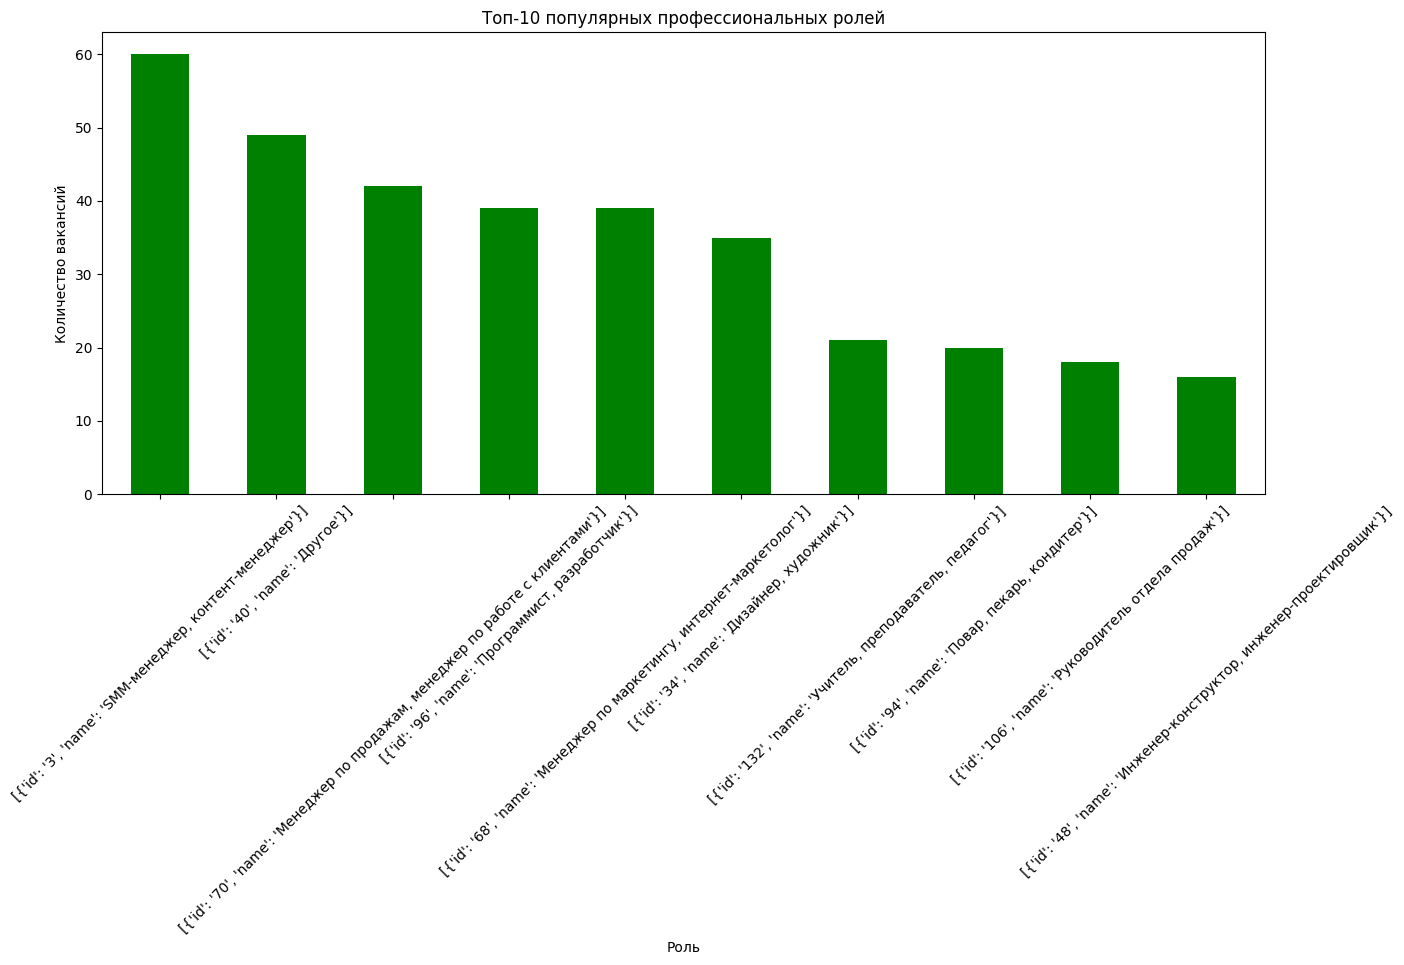

In [68]:
role_counts = df['professional_roles'].value_counts()

plt.figure(figsize=(15, 6))
role_counts.head(10).plot(kind='bar', color='green')
plt.title('Топ-10 популярных профессиональных ролей')
plt.xlabel('Роль')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.show()


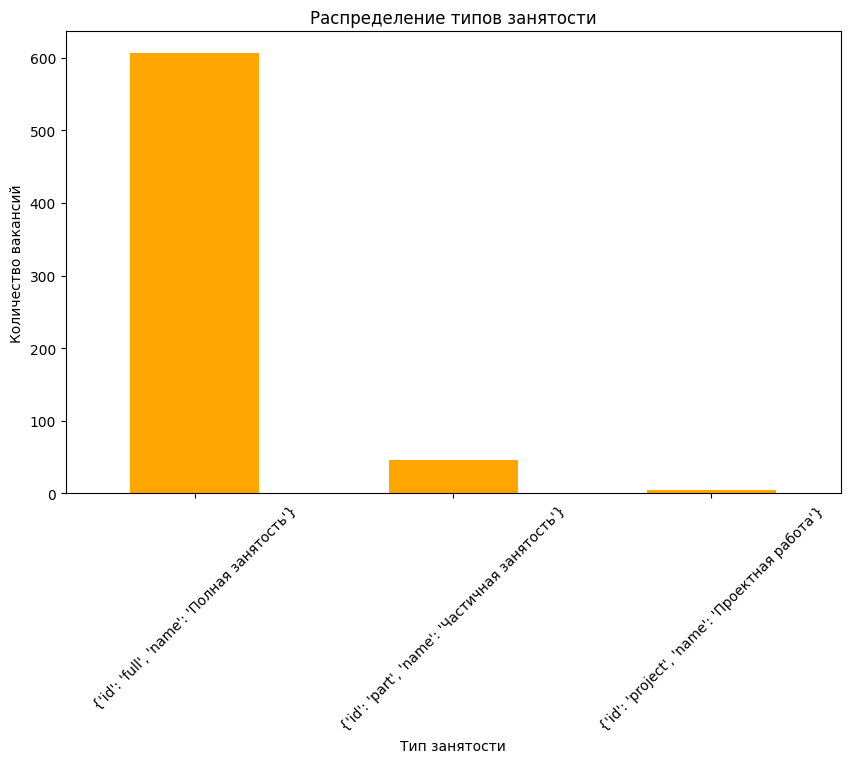

In [69]:
employment_counts = df['employment'].value_counts()

plt.figure(figsize=(10, 6))
employment_counts.plot(kind='bar', color='orange')
plt.title('Распределение типов занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import ast

def extract_value(column, key):

    try:
        parsed_data = ast.literal_eval(column)
        if isinstance(parsed_data, list) and len(parsed_data) > 0:
            return parsed_data[0].get(key, None)
        # Если это словарь
        elif isinstance(parsed_data, dict):
            return parsed_data.get(key, None)
        else:
            return None
    except (ValueError, SyntaxError):
        return None


data_cleaned = pd.DataFrame({
    "Name": df["name"], 
    "City": df["area"].apply(lambda x: extract_value(x, "name")),  
    "Salary_From": df["salary"].apply(lambda x: extract_value(x, "from")),
    "Salary_To": df["salary"].apply(lambda x: extract_value(x, "to")),  
    "Currency": df["salary"].apply(lambda x: extract_value(x, "currency")), 
    "Experience": df["experience"].apply(lambda x: extract_value(x, "name")), 
    "Employment_Type": df["employment"].apply(lambda x: extract_value(x, "name")),  
    "Role": df["professional_roles"].apply(lambda x: extract_value(x, "name")),  
})

data_cleaned.head()


,Name,City,Salary_From,Salary_To,Currency,Experience,Employment_Type,Role
0,Заместитель Генерального директора,Астана,600000.0,800000.0,KZT,Более 6 лет,Полная занятость,"Директор магазина, директор сети магазинов"
1,Юрист,Астана,NaN,NaN,None,От 3 до 6 лет,Полная занятость,Юрист
2,Java-программист,Астана,NaN,NaN,None,От 1 года до 3 лет,Полная занятость,"Программист, разработчик"
3,"Веб-дизайнер (Figma, Tilda, Elementor, UI\UX)",Астана,200000.0,400000.0,KZT,От 1 года до 3 лет,Полная занятость,"Дизайнер, художник"
4,Юрист-договорник в ТЭК,Астана,NaN,NaN,None,Более 6 лет,Полная занятость,Юрист


In [5]:
# Проверка формата данных в столбце `professional_roles`
data["professional_roles"].head().apply(type)


0    <class 'str'>
1    <class 'str'>
2    <class 'str'>
3    <class 'str'>
4    <class 'str'>
Name: professional_roles, dtype: object

In [6]:
# Просмотр первых строк столбца `professional_roles` для анализа структуры
data["professional_roles"].head()


0    [{'id': '35', 'name': 'Директор магазина, дире...
1                     [{'id': '146', 'name': 'Юрист'}]
2    [{'id': '96', 'name': 'Программист, разработчи...
3         [{'id': '34', 'name': 'Дизайнер, художник'}]
4                     [{'id': '146', 'name': 'Юрист'}]
Name: professional_roles, dtype: object

<h1>Предобработка данных:</h1>

In [8]:
# Шаг 1: Извлечение вложенных структур
data_cleaned = pd.DataFrame({
    "Name": data["name"],  # Название вакансии
    "City": data["area"].apply(lambda x: extract_value(x, "name")),  # Город
    "Salary_From": data["salary"].apply(lambda x: extract_value(x, "from")),  # ЗП "от"
    "Salary_To": data["salary"].apply(lambda x: extract_value(x, "to")),  # ЗП "до"
    "Currency": data["salary"].apply(lambda x: extract_value(x, "currency")),  # Валюта
    "Experience": data["experience"].apply(lambda x: extract_value(x, "name")),  # Опыт
    "Employment_Type": data["employment"].apply(lambda x: extract_value(x, "name")),  # Тип занятости
    "Role": data["professional_roles"].apply(lambda x: extract_value(x, "name")),  # Роль
})

# Шаг 2: Удаление дубликатов
data_cleaned.drop_duplicates(inplace=True)

# Шаг 3: Обработка пропущенных значений
# Пропущенные значения в зарплате заменяем на 0
data_cleaned["Salary_From"].fillna(0, inplace=True)
data_cleaned["Salary_To"].fillna(0, inplace=True)

# Пропущенные значения в текстовых полях заменяем на "Unknown"
data_cleaned["City"].fillna("Unknown", inplace=True)
data_cleaned["Experience"].fillna("Unknown", inplace=True)
data_cleaned["Employment_Type"].fillna("Unknown", inplace=True)
data_cleaned["Role"].fillna("Unknown", inplace=True)

# Шаг 4: Приведение к нижнему регистру текстовых данных
data_cleaned["Name"] = data_cleaned["Name"].str.lower()
data_cleaned["City"] = data_cleaned["City"].str.lower()
data_cleaned["Experience"] = data_cleaned["Experience"].str.lower()
data_cleaned["Employment_Type"] = data_cleaned["Employment_Type"].str.lower()
data_cleaned["Role"] = data_cleaned["Role"].str.lower()

# Просмотр итоговых данных
data_cleaned.head()


C:\Users\User\AppData\Local\Temp\ipykernel_10960\3211959253.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned["Salary_From"].fillna(0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_10960\3211959253.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

,Name,City,Salary_From,Salary_To,Currency,Experience,Employment_Type,Role
0,заместитель генерального директора,астана,600000.0,800000.0,KZT,более 6 лет,полная занятость,"директор магазина, директор сети магазинов"
1,юрист,астана,0.0,0.0,None,от 3 до 6 лет,полная занятость,юрист
2,java-программист,астана,0.0,0.0,None,от 1 года до 3 лет,полная занятость,"программист, разработчик"
3,"веб-дизайнер (figma, tilda, elementor, ui\ux)",астана,200000.0,400000.0,KZT,от 1 года до 3 лет,полная занятость,"дизайнер, художник"
4,юрист-договорник в тэк,астана,0.0,0.0,None,более 6 лет,полная занятость,юрист


In [11]:
# Сохранение предобработанных данных в новый CSV-файл
cleaned_file_path = '../data/vacancies_cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)
cleaned_file_path


'../data/vacancies_cleaned.csv'

In [46]:
# Очистка данных
df = df.drop_duplicates()  # Удаляем дубликаты
df = df.dropna(subset=['salary', 'name'])  # Удаляем строки с пропущенными зарплатами и названиями

# Преобразуем данные о зарплатах в числовой формат
df['salary_min'] = df['salary'].apply(lambda x: eval(x)['from'] if isinstance(eval(x), dict) else None)
df['salary_max'] = df['salary'].apply(lambda x: eval(x)['to'] if isinstance(eval(x), dict) else None)

# Проверим преобразования
df[['salary', 'salary_min', 'salary_max']].head()

# Пример нормализации валюты (если в столбце salary указана валюта)
df['salary_min'] = df['salary_min'].fillna(df['salary_min'].mean())  # Заполняем пропуски средним значением
df['salary_max'] = df['salary_max'].fillna(df['salary_max'].mean())  # То же для max

# Убедимся, что все преобразования выполнены корректно
df[['salary_min', 'salary_max']].describe()

,salary_min,salary_max
count,6.570000e+02,6.570000e+02
mean,3.682265e+05,5.574589e+05
std,2.367078e+05,3.556227e+05
min,4.000000e+02,7.000000e+02
25%,2.500000e+05,3.840000e+05
50%,3.500000e+05,5.574589e+05
75%,4.000000e+05,5.574589e+05
max,2.000000e+06,3.000000e+06


<h1>NLP-анализ:</h1>

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
Частые слова в 'name': [('менеджер', np.int64(137)), ('продаж', np.int64(62)), ('руководител', np.int64(60)), ('отдел', np.int64(52)), ('специалист', np.int64(51)), ('инженер', np.int64(45)), ('главн', np.int64(43)), ('директор', np.int64(42)), ('маркетолог', np.int64(39)), ('сммменеджер', np.int64(32))]
Частые слова в 'professional_roles': [('id', np.int64(1000)), ('name', np.int64(1000)), ('менеджер', np.int64(221)), ('друг', np.int64(77)), ('программист', np.int64(72)), ('разработчик', np.int64(72)), ('продаж', np.int64(71)), ('контентменеджер', np.int64(64)), ('руководител', np.int64(64)), ('сммменеджер', np.int64(64))]
Частые слова в 'snippet': [('requirement', np.int64(1000)), ('responsibility', np.int64(1000)), ('работ', np.int64(877)), ('оп', np.int64(722)), ('hигhлигhттеxтразработкаhигhлигhттеxт', np.int64(615)), ('знан', np.int64(349)), ('образован', np.int64(312)), ('лет', np.int64(262)), ('высш

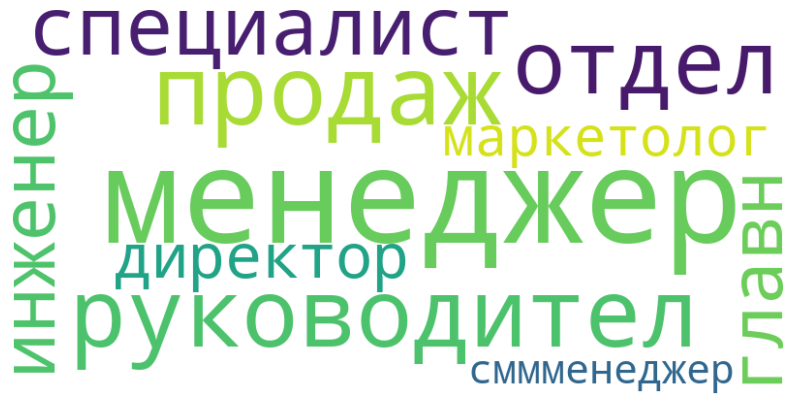

In [43]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download()

df = pd.DataFrame(data)

# Предобработка текста: удаляем лишние символы, приводим к нижнему регистру
def preprocess_text(text):
    text = text.lower()  # Приводим текст к нижнему регистру
    text = re.sub(r'[^a-zA-Zа-яА-ЯёЁ\s]', '', text)  # Убираем все, кроме букв и пробелов
    return text

# Применяем предобработку ко всем текстовым столбцам
df['name'] = df['name'].apply(preprocess_text)
df['professional_roles'] = df['professional_roles'].apply(preprocess_text)
df['snippet'] = df['snippet'].apply(preprocess_text)

# Стемминг текста с использованием SnowballStemmer для русского языка
stemmer = SnowballStemmer("russian")
def stem_text(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df['name_stemmed'] = df['name'].apply(stem_text)
df['professional_roles_stemmed'] = df['professional_roles'].apply(stem_text)
df['snippet_stemmed'] = df['snippet'].apply(stem_text)

# Частотный анализ
def get_most_common_words(text_column, n=10):
    # Преобразуем весь текст в одну строку
    all_text = " ".join(text_column)
    # Используем CountVectorizer для подсчета частоты слов
    vectorizer = CountVectorizer(stop_words=stopwords.words('russian'))
    word_count = vectorizer.fit_transform([all_text])
    word_freq = zip(vectorizer.get_feature_names_out(), word_count.toarray().sum(axis=0))
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    return word_freq[:n]

# Частотный анализ для разных столбцов
name_most_common = get_most_common_words(df['name_stemmed'])
professional_roles_most_common = get_most_common_words(df['professional_roles_stemmed'])
snippet_most_common = get_most_common_words(df['snippet_stemmed'])

print("Частые слова в 'name':", name_most_common)
print("Частые слова в 'professional_roles':", professional_roles_most_common)
print("Частые слова в 'snippet':", snippet_most_common)

# Визуализация частотных слов (WordCloud)
def plot_wordcloud(words_freq):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words_freq))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Визуализируем наиболее частые слова для столбца 'name'
plot_wordcloud(name_most_common)


In [41]:
%pip install stopwords

Note: you may need to restart the kernel to use updated packages.


<h1>visualization</h1>

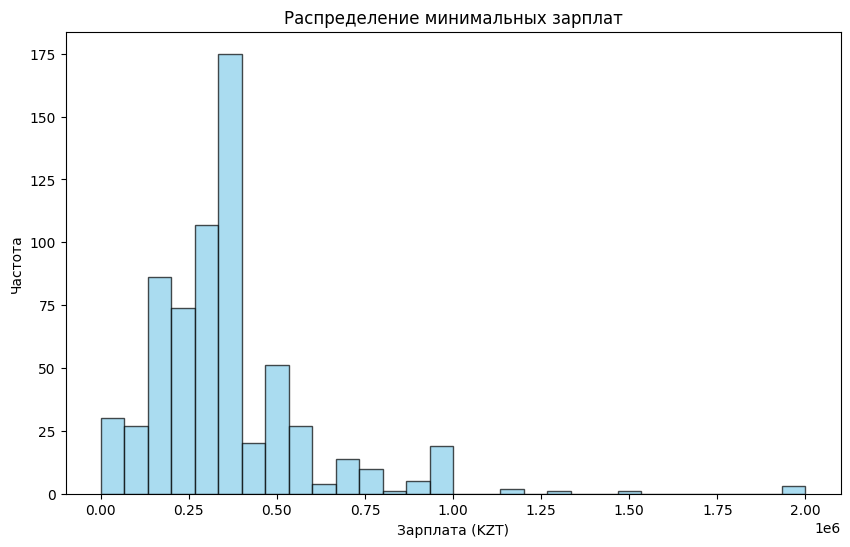

In [47]:
# Построим график распределения зарплат
plt.figure(figsize=(10, 6))
plt.hist(df['salary_min'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение минимальных зарплат')
plt.xlabel('Зарплата (KZT)')
plt.ylabel('Частота')
plt.show()


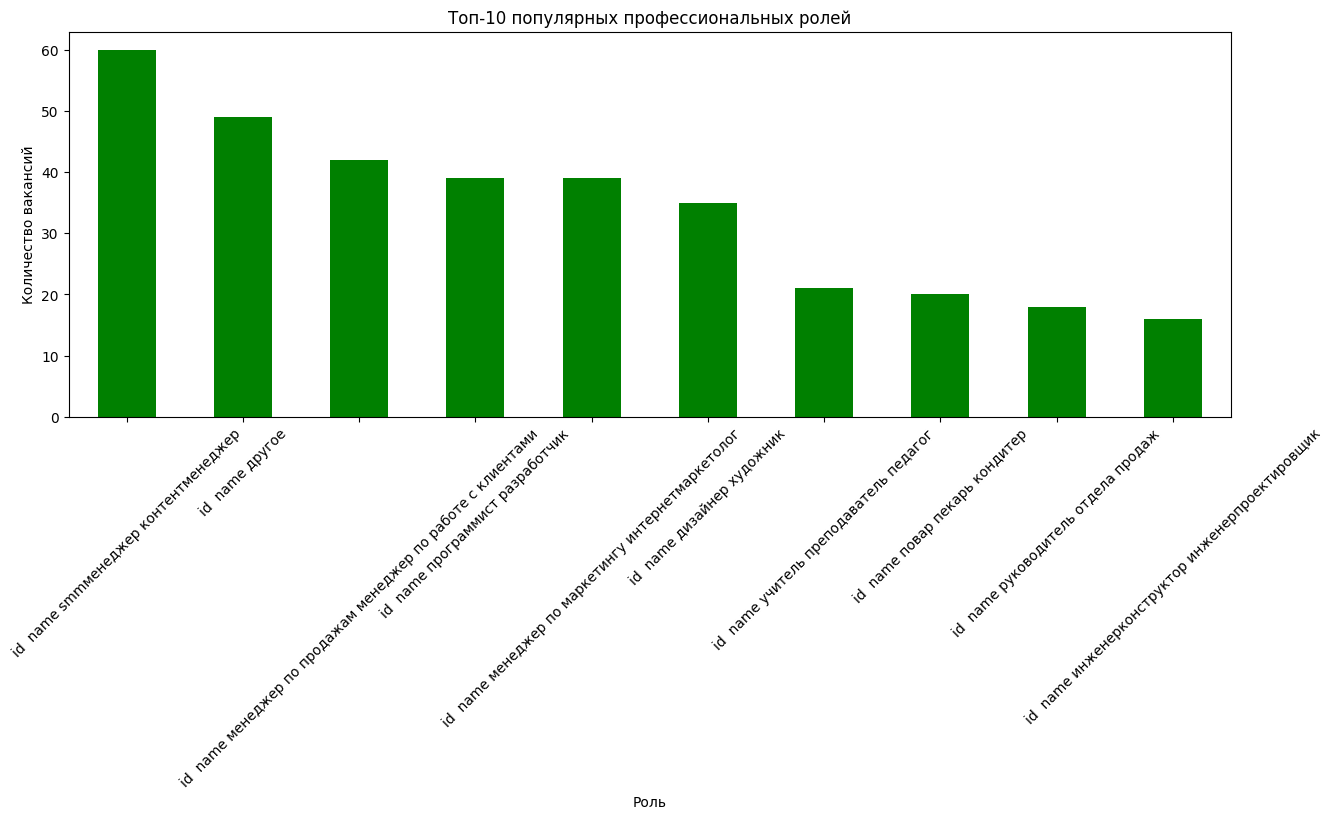

In [49]:
# Анализируем популярность ролей
role_counts = df['professional_roles'].value_counts()

plt.figure(figsize=(15, 5))
role_counts.head(10).plot(kind='bar', color='green')
plt.title('Топ-10 популярных профессиональных ролей')
plt.xlabel('Роль')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.show()
